## Cat Vs. Dog

# 1. Transform & Estabilish Loader

In [1]:
# Transform & Establish loader
import torch
from torchvision import datasets, transforms

data_dir = 'Cat_Dog_data'
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5], 
                                                            [0.5, 0.5, 0.5])]) 

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),                                       
                                      transforms.Normalize([0.5, 0.5, 0.5], 
                                                           [0.5, 0.5, 0.5])])

# Pass transforms to loader
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

# 2. Define Model

In [2]:
from torch import nn
from torch import optim

model = nn.Sequential(nn.Linear(150528, 600),
                      nn.ReLU(),
                      nn.Dropout(p=0.2),
                      nn.Linear(600, 100),
                      nn.ReLU(),
                      nn.Dropout(p=0.2),
                      nn.Linear(100, 30),
                      nn.LogSoftmax(dim=1))

# if using GPU
# model = sq.cuda()
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# print(device)

# 3. Loss Function and Optimizer

In [3]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

# 4. Train & Validation

In [4]:
epochs = 3
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # images = images.to(device) # if using GPU
        # labels = labels.to(device) # if using GPU
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                images = images.view(images.shape[0], -1)
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))        

Epoch: 1/3..  Training Loss: 8.796..  Test Loss: 22111.641..  Test Accuracy: 0.506
Epoch: 2/3..  Training Loss: 244.482..  Test Loss: 4970.770..  Test Accuracy: 0.506
Epoch: 3/3..  Training Loss: 46.383..  Test Loss: 3957.413..  Test Accuracy: 0.506


# 5. The First-Time Save

In [16]:
# The First Save
checkpoint = {'state_dict': model.state_dict(),
              'optimizer':optimizer.state_dict(),
              'train_losses':train_losses,
              'test_losses':test_losses
}

torch.save(checkpoint, 'cat-vs-dog-checkpoint.pth')

## New Iteration Of Training
# 6. Load Checkpoint

In [17]:
import torch
from torch import nn
from torch import optim

model = nn.Sequential(nn.Linear(150528, 600),
                      nn.ReLU(),
                      nn.Dropout(p=0.2),
                      nn.Linear(600, 100),
                      nn.ReLU(),
                      nn.Dropout(p=0.2),
                      nn.Linear(100, 30),
                      nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

checkpoint = torch.load('cat-vs-dog-checkpoint.pth')
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

# 7. Check The Loaded Data

In [18]:
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())
print(checkpoint['train_losses'])
print(checkpoint['test_losses'])

0.weight 	 torch.Size([600, 150528])
0.bias 	 torch.Size([600])
3.weight 	 torch.Size([100, 600])
3.bias 	 torch.Size([100])
6.weight 	 torch.Size([30, 100])
6.bias 	 torch.Size([30])
[8.796342773870988, 244.482233172399, 46.3833776791289]
[tensor(22111.6406), tensor(4970.7700), tensor(3957.4133)]


# 8. Transfrom & Establish Loader

In [19]:
from torchvision import datasets, transforms
data_dir = 'Cat_Dog_data'
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5], 
                                                            [0.5, 0.5, 0.5])]) 

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),                                       
                                      transforms.Normalize([0.5, 0.5, 0.5], 
                                                           [0.5, 0.5, 0.5])])

# Pass transforms to loader
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

# 9.Train & Validation

In [20]:
# Train & Validation
epochs = 1
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # images = images.to(device)
        # labels = labels.to(device)
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                images = images.view(images.shape[0], -1)
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))        

Epoch: 1/1..  Training Loss: 34.287..  Test Loss: 1815.335..  Test Accuracy: 0.506


# 10. The Second-time Save

In [ ]:
# to preserve the first training data
train_losses = checkpoint['train_losses'] + train_losses
test_losses = checkpoint['test_losses'] + test_losses

checkpoint = {'state_dict': model.state_dict(),
              'optimizer':optimizer.state_dict(),
              'train_losses':train_losses,
              'test_losses':test_losses
}

torch.save(checkpoint, 'cat-vs-dog-checkpoint.pth')

# 11. Test An Image

Test Accuracy: 0.000


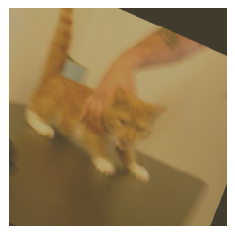

In [91]:
import helper
%matplotlib inline

imgloader = torch.utils.data.DataLoader(train_data, batch_size=1) # load only 1 image
images, labels = next(iter(imgloader))

helper.imshow(images[0,:])
img = images.view(images.shape[0], -1)

# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
top_p, top_class = ps.topk(1, dim=1)
equals = top_class == labels.view(*top_class.shape)
accuracy = torch.mean(equals.type(torch.FloatTensor))
    
print("Test Accuracy: {:.3f}".format(accuracy))